In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysindy as ps
import os
from scipy.signal import detrend

In [28]:
#Filtering the columns from raw data#
def data_column_filter_by_col_name(raw_data, num):
    col_name_list = list(raw_data.columns)
    reqd_col_names = list(filter(lambda x : "Smoothed result" in x , col_name_list))
    #plotting the data for each xl#
    plt.figure(num)
    plt.plot(raw_data[reqd_col_names])
    return raw_data[reqd_col_names]

C:\Users\SAWON\AppData\Local\Temp\ipykernel_18812\2744556579.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(num)


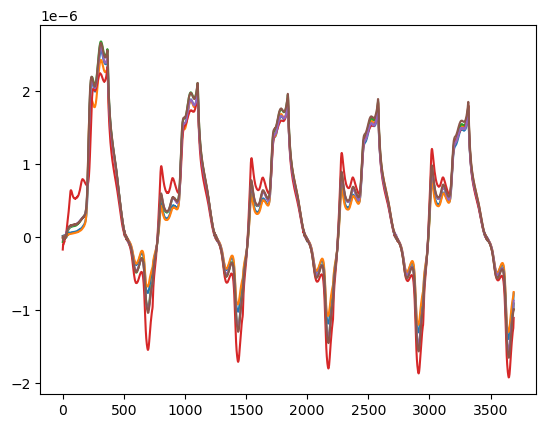

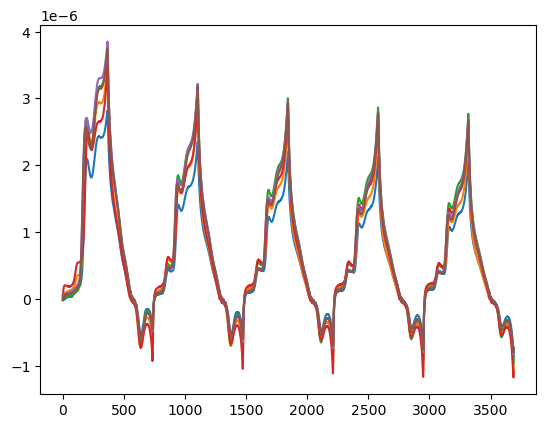

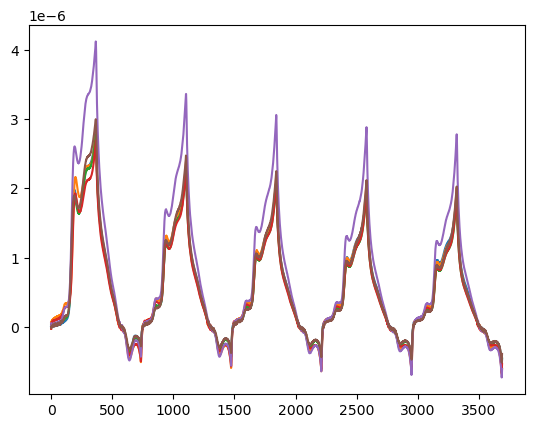

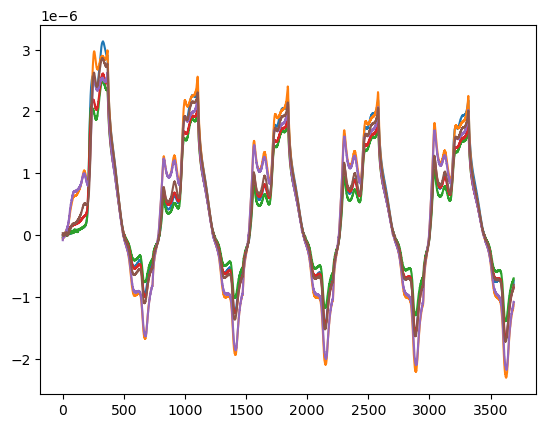

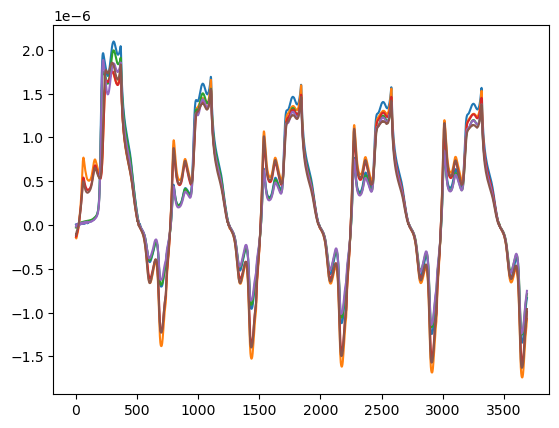

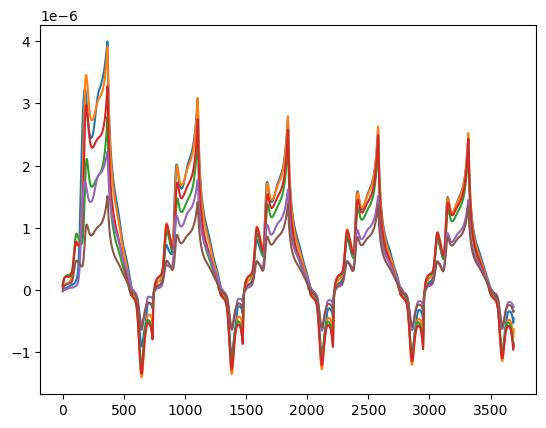

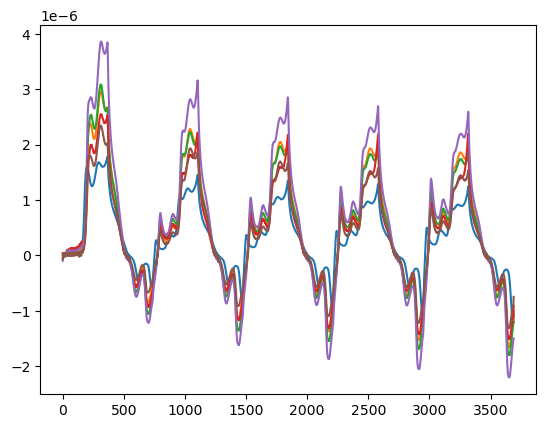

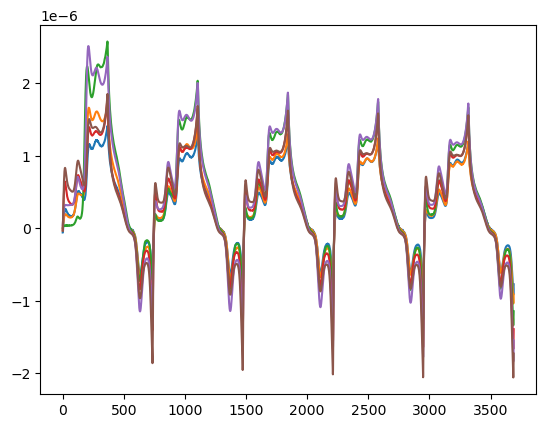

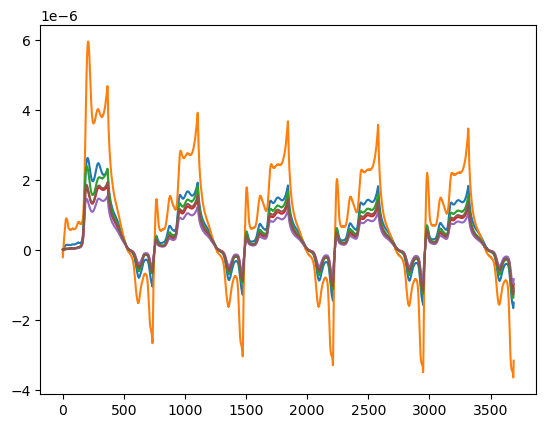

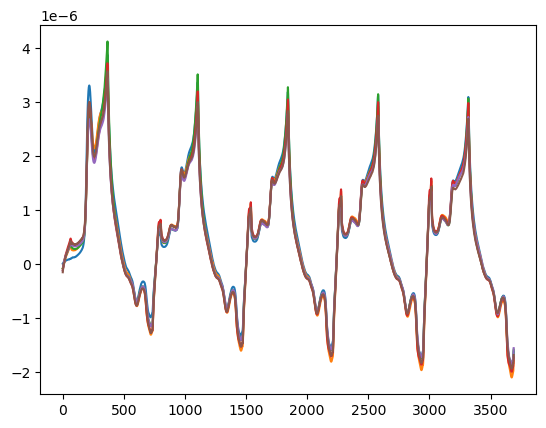

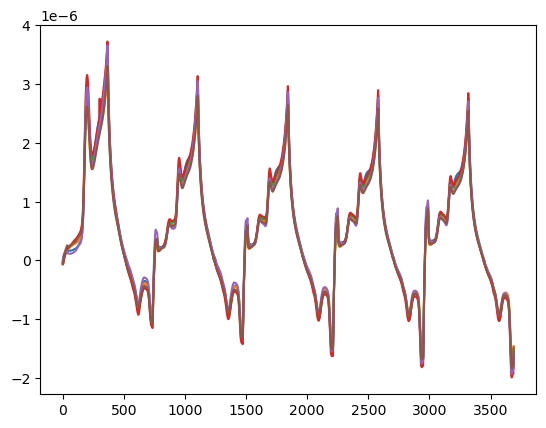

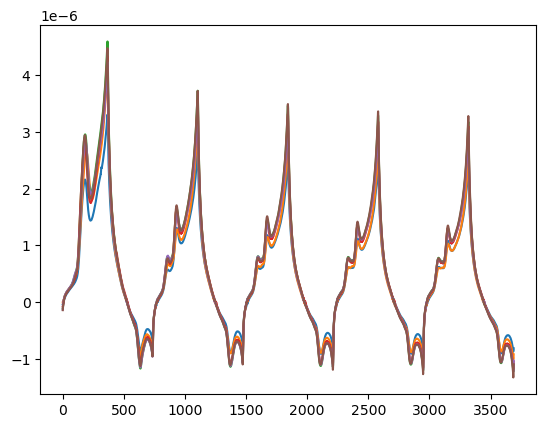

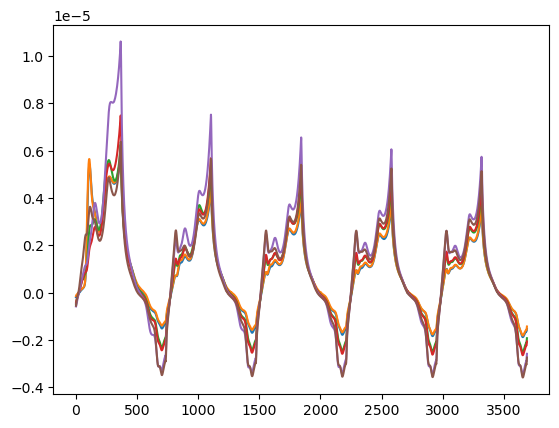

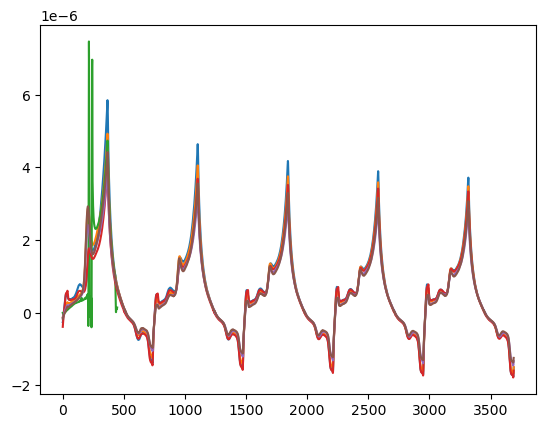

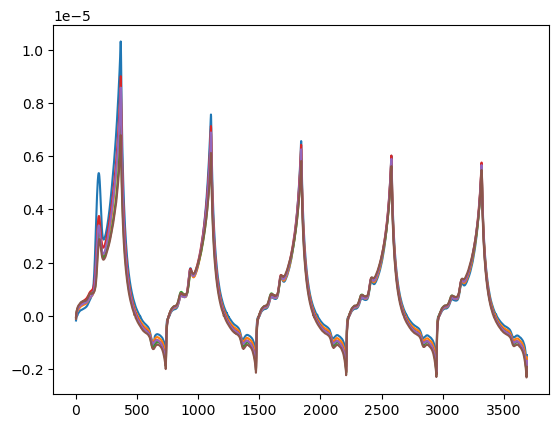

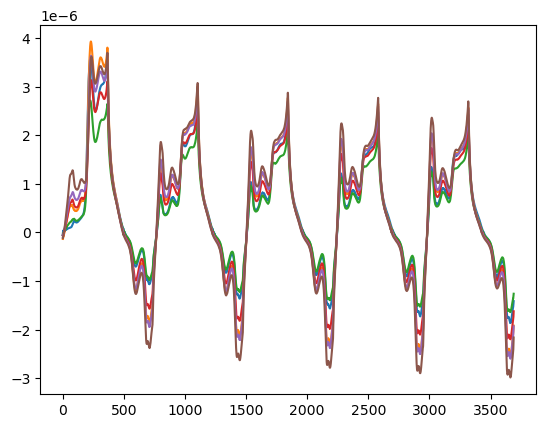

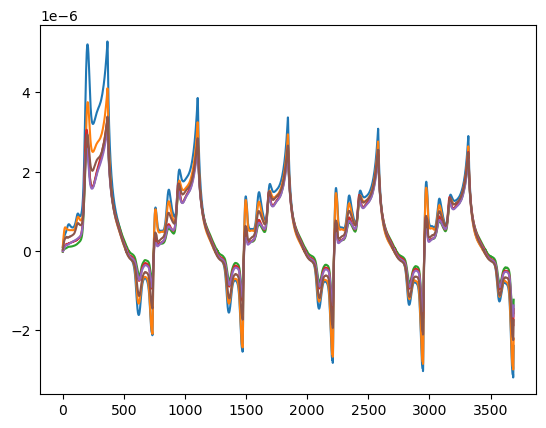

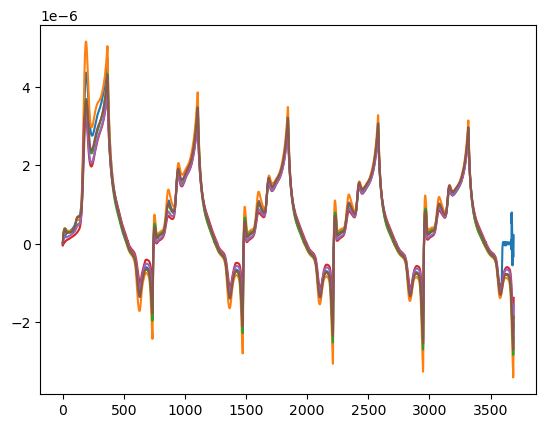

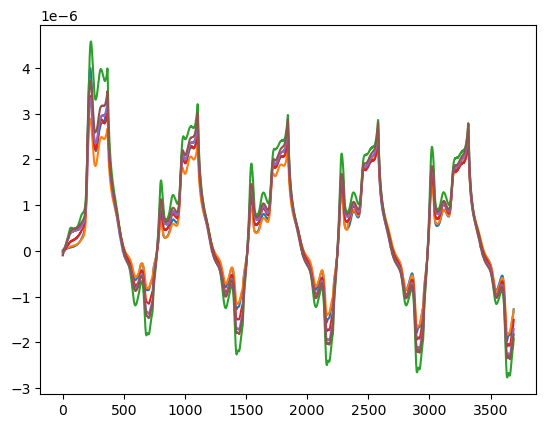

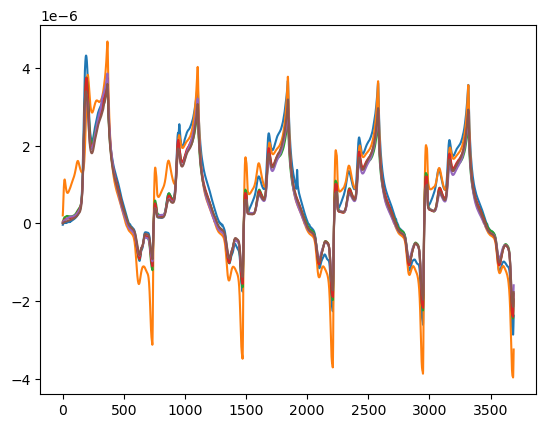

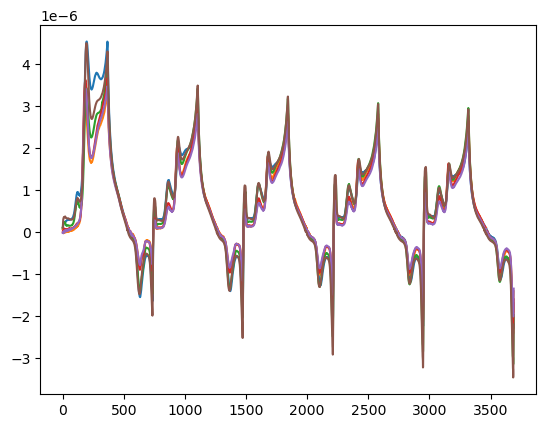

In [29]:
file_loc = "C:/Users/SAWON/OneDrive/Desktop/data"
file_list = os.listdir(file_loc)
data_dict = dict()
#Looping through the files and importing the xlsx files#
count = 1
for file in file_list:
    if file.endswith(".xlsx"):
        raw_data = pd.read_excel(file_loc+"/"+file)
        actual_data = data_column_filter_by_col_name(raw_data , count)
        count += 1
        data_dict[file] = actual_data

In [30]:
print(list(data_dict.keys()))
data_dict['my_ACN(PBS_7).xlsx']

['my_ACN(Acetate_5).xlsx', 'my_ACN(Acetate_6).xlsx', 'my_ACN(Acetate_7).xlsx', 'my_ACN(Citrate_5).xlsx', 'my_ACN(Citrate_6).xlsx', 'my_ACN(Citrate_7).xlsx', 'my_ACN(PBS_5).xlsx', 'my_ACN(PBS_6).xlsx', 'my_ACN(PBS_7).xlsx', 'my_ACRYL(ABS5).xlsx', 'my_ACRYL(ABS6).xlsx', 'my_ACRYL(ABS7).xlsx', 'my_ACRYL(CBS5).xlsx', 'my_ACRYL(CBS6).xlsx', 'my_ACRYL(CBS7).xlsx', 'my_ACRYL(PBS5).xlsx', 'my_ACRYL(PBS6).xlsx', 'my_ACRYL(PBS7).xlsx', 'my_MAA(PBS_5).xlsx', 'my_MAA(PBS_6).xlsx', 'my_MAA(PBS_7).xlsx']


,Smoothed result Y,Smoothed result Y.1,Smoothed result Y.2,Smoothed result Y.3,Smoothed result Y.4,Smoothed result Y.5
0,-8.169830e-08,-2.206730e-07,9.897080e-10,-6.810470e-09,3.352240e-09,3.953550e-09
1,-6.539530e-08,-2.009010e-07,4.031760e-09,-1.844530e-09,-2.492140e-09,-7.447080e-10
2,-4.501970e-08,-1.432060e-07,8.955190e-09,3.626370e-09,-1.182190e-08,4.273780e-11
3,-2.245880e-08,-1.001130e-07,1.578720e-09,1.000430e-08,-1.395080e-08,-1.318310e-08
4,-1.162090e-08,-6.727740e-09,3.124880e-09,4.017420e-09,-7.448240e-09,-6.149950e-09
...,...,...,...,...,...,...
3685,-1.672020e-06,-3.655230e-06,-1.384350e-06,-1.132930e-06,-9.794950e-07,-1.287150e-06
3686,-1.655030e-06,-3.652240e-06,-1.375060e-06,-1.128110e-06,-9.764520e-07,-1.282660e-06
3687,-1.626980e-06,-3.545930e-06,-1.322630e-06,-1.089390e-06,-9.415020e-07,-1.236020e-06
3688,-1.574690e-06,-3.362850e-06,-1.254970e-06,-1.045410e-06,-8.953160e-07,-1.175550e-06


In [31]:
# Detrending the data#
## Linear detrending ##
def detrended_data(data):
    reqd_dataFrame = pd.DataFrame()
    column_name_list = list(data.columns)
    for col_name in column_name_list: 
        reqd_dataFrame[col_name] = detrend(data[col_name])
    return reqd_dataFrame

In [32]:
## Check NaN ##
def checkNan(data):
    null_column_list = []
    for col_name in list(data.columns):
        if data[col_name].isnull().values.any():
            null_column_list.append(col_name)
    return null_column_list

In [26]:
detrended_data_dict = dict()
for key in list(data_dict.keys()):
    null_columns = checkNan(data_dict[key])
    if len(null_columns) != 0:
        print(key)
        print(null_columns)
        data_dict[key] = data_dict[key].drop(null_columns, axis = 1)
    detrended_data_dict[key] = detrended_data(data_dict[key])
    
    ##ploting Detrended data##
    plt.figure()
    plt.plot(detrended_data_dict[key])

my_ACRYL(CBS6).xlsx
['Smoothed result Y.2']
